# S03 T01: Visualització gràfica d'un dataset

### Ex1
##### Resumeix gràficament el data set DelayedFlights.csv
##### Crea almenys una visualització per:

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('DelayedFlights.csv')
#df.columns

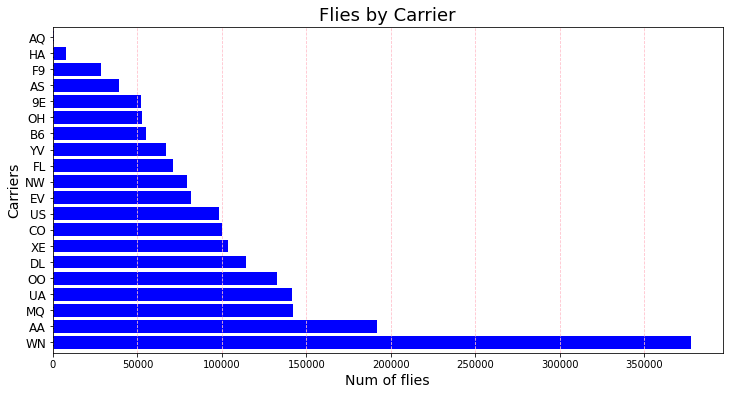

In [2]:
# Una variable categòrica (UniqueCarrier) 
# Using PANDAS.PLOT
df['UniqueCarrier'].value_counts().plot(kind='barh', figsize=(12, 6), width = 0.8, color = 'blue')

plt.title('Flies by Carrier', size =18)
plt.ylabel('Carriers', size =14)
plt.xlabel('Num of flies', size =14)
plt.grid(axis = 'x', ls = '--', color = "pink")
plt.yticks(size =12)
plt.savefig("Flies by Carrier.png")
plt.show()

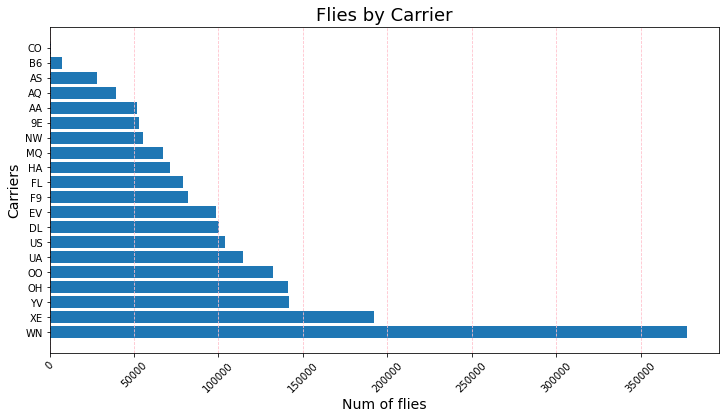

In [3]:
# Una variable categòrica (UniqueCarrier) 
# Using MATPLOT with arrays
carriers= df['UniqueCarrier'].unique()
flyCarrier = df['UniqueCarrier'].value_counts().to_numpy()

# figsize defaul = 6.4 x 4.8 inches
plt.figure(figsize=(12,6))
plt.barh(carriers,flyCarrier)
plt.title('Flies by Carrier', size =18)
plt.ylabel('Carriers', size =14)
plt.xlabel('Num of flies', size =14)
plt.grid(axis = 'x', ls = '--', color = "pink")
plt.xticks(rotation=45)
plt.show()

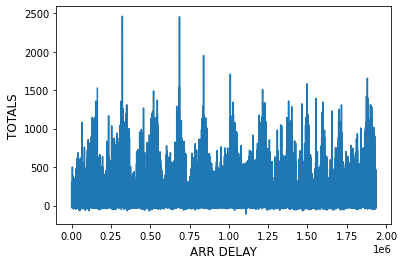

In [4]:
# Una variable numèrica (ArrDelay) 
x = df['ArrDelay']

plt.plot(x)
plt.xlabel ("ARR DELAY", size =12)
plt.ylabel ("TOTALS", size =12)
plt.show()

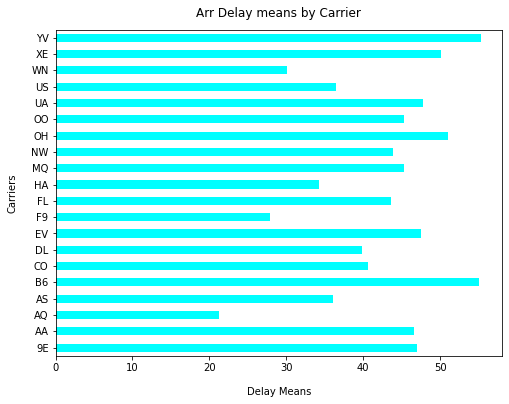

In [5]:
# Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier) 
x = df['UniqueCarrier']
y=  df['ArrDelay']
# mitja delay per Carrier
mitja = df.groupby('UniqueCarrier')['ArrDelay'].mean()

mitja.plot(kind='barh', figsize=(8, 6), color ='cyan')
plt.xlabel("Delay Means", labelpad=14)
plt.ylabel("Carriers", labelpad=14)
plt.title("Arr Delay means by Carrier", y=1.02)
plt.savefig("Arr Delay by Carrier.png")
plt.show()

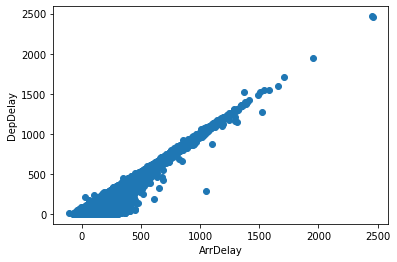

In [6]:
# Dues variables numèriques (ArrDelay i DepDelay) 
x = df['ArrDelay']
y=  df['DepDelay']

plt.scatter(x,y,)
plt.xlabel('ArrDelay')
plt.ylabel('DepDelay')
# plt.savefig('Scatter_ARR & DEP delays.png')
plt.show()

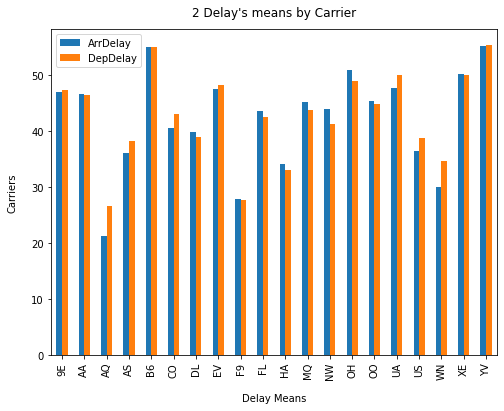

In [7]:
# Tres variables (ArrDelay, DepDelay i UniqueCarrier) -> 2 Scatter
# mitja delay per Carrier
mitja = df.groupby('UniqueCarrier')[['ArrDelay','DepDelay']].mean()

mitja.plot(kind='bar', figsize=(8, 6))
plt.xlabel("Delay Means", labelpad=14)
plt.ylabel("Carriers", labelpad=14)
plt.title("2 Delay's means by Carrier", y=1.02)
plt.savefig("2 Delay's means by Carrier.png")
plt.show()

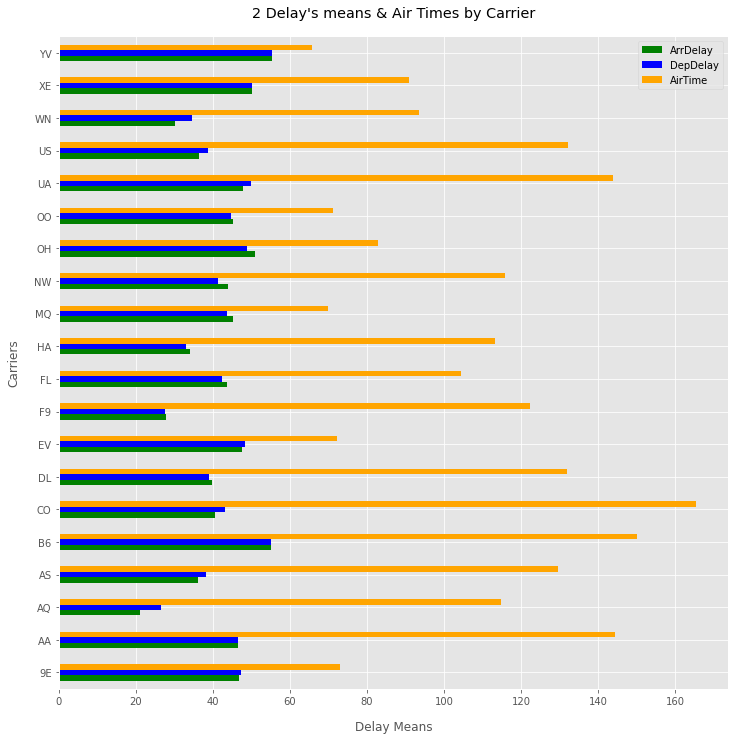

In [8]:
#Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier) > 3 Scatter 
w = df['AirTime']
x = df['ArrDelay']
y=  df['DepDelay']
z = df['UniqueCarrier']
# mitja delay per Carrier
mitja = df.groupby(z, )[['ArrDelay','DepDelay','AirTime']].mean()
#mitja.sort_values(z, ascending=False)
plt.style.use('ggplot')
c= ['green', 'blue','orange']
mitja.plot(kind='barh', figsize=(12, 12), color = c)
plt.xlabel("Delay Means", labelpad=14)
plt.ylabel("Carriers", labelpad=14)
plt.title("2 Delay's means & Air Times by Carrier", y=1.02)
plt.savefig("2 Delay's means & Air Times by Carrier.png")
plt.show()

### Ex2
##### Exporta els gràfics com imatges o com html.

###### CHECK same png examples generated here, now in github directory

### Ex3  
##### Integra les visualitzacions gràfiques, en la tasca 5, del Sprint 2.

In [9]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('DelayedFlights.csv')

df = df.drop(df.columns[0], axis= 1)
cols = ["Year", "Month", 'DayofMonth', 'DayOfWeek', 'FlightNum', 'TailNum','Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay','LateAircraftDelay' ]
dfclean = df.drop(columns = cols)
dfclean.tail(10)
# velocitat mitja miles*hour
dfclean['TempsVol'] = round((dfclean['ArrTime'] - dfclean['DepTime'])/60,2)
# distance /hours
dfclean['velAvgMph'] = round (dfclean['Distance'] / dfclean['TempsVol'],2)
print(dfclean[['Distance', 'TempsVol', 'velAvgMph']].head(20))


    Distance  TempsVol  velAvgMph
0        810      3.47     233.43
1        810      4.13     196.13
2        515      2.93     175.77
3        515      2.17     237.33
4        688      3.02     227.81
5       1591      1.67     952.69
6        828      3.50     236.57
7        828      3.35     247.16
8        162     -0.13   -1246.15
9       1489      3.13     475.72
10      1489      3.10     480.32
11       838      3.38     247.93
12       220      1.60     137.50
13       220      1.62     135.80
14       220      0.93     236.56
15       220      1.57     140.13
16       220      1.65     133.33
17      1093      3.92     278.83
18      1093      4.75     230.11
19       972      3.78     257.14


In [10]:
# arriba tard? Bool
# print(dfclean[['ArrDelay', 'DepDelay']].head())
dfclean['DelayMin'] = (dfclean['ArrDelay'] + dfclean['DepDelay']) 
# delaymin > 0
dfclean['Delay'] = dfclean['DelayMin'] > 0
print(dfclean[['Origin','Dest','DelayMin','Delay']].head(10))
# value_count
dfclean['Delay'].value_counts()
print(dfclean['Delay'].value_counts())

delayed = dfclean['Delay'].sum()
total = dfclean.shape[0]
print("Percen vols endarrerits = {} %".format(round((delayed*100)/total, 2)))


  Origin Dest  DelayMin  Delay
0    IAD  TPA      -6.0  False
1    IAD  TPA      21.0   True
2    IND  BWI      22.0   True
3    IND  BWI      68.0   True
4    IND  JAX      36.0   True
5    IND  LAS     124.0   True
6    IND  MCO       7.0   True
7    IND  MCO     174.0   True
8    IND  MDW      20.0   True
9    IND  PHX      42.0   True
True     1876370
False      60388
Name: Delay, dtype: int64
Percen vols endarrerits = 96.88 %


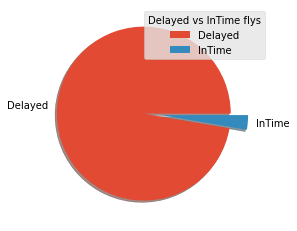

In [11]:
notDelayed = dfclean['DelayMin'] <= 0
ok = notDelayed.sum()
y = np.array([delayed,ok])
mylabels = ["Delayed", "InTime"]
myexplode = [0.2, 0]

plt.pie(y, labels = mylabels, explode = myexplode, shadow = True)
plt.legend(title = "Delayed vs InTime flys")
plt.show() 

In [12]:
# Taula aerolínies + delays
by_Cia = dfclean.groupby(by='UniqueCarrier')['DelayMin'].mean()
# dfclean_Cia = dfclean.groupby(by=['UniqueCarrier','DelayMin'])
print (by_Cia)
# print(by_Cia[['UniqueCarrier','DelayMin']].head(10))

UniqueCarrier
9E     94.287188
AA     92.957095
AQ     47.279570
AS     74.036657
B6    110.024033
CO     83.630025
DL     78.887846
EV     95.818779
F9     55.611253
FL     86.171821
HA     67.266863
MQ     88.897127
NW     85.175640
OH     99.930948
OO     90.069320
UA     97.688242
US     75.205067
WN     64.676455
XE    100.144221
YV    110.639563
Name: DelayMin, dtype: float64


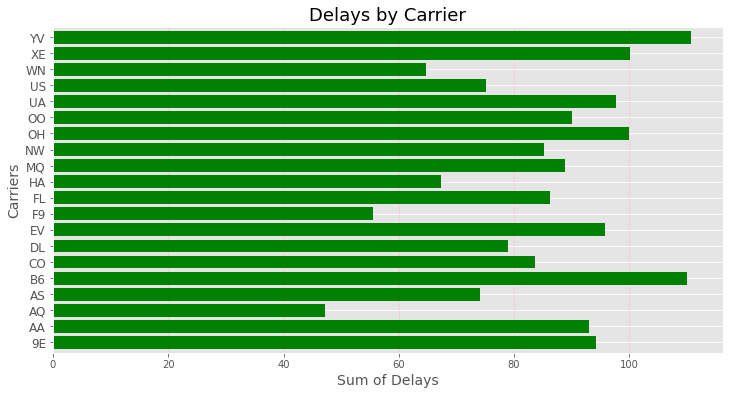

In [13]:
dfclean.groupby(by='UniqueCarrier')['DelayMin'].mean().plot(kind='barh', figsize=(12, 6), width = 0.8, color = 'green')

plt.title('Delays by Carrier', size =18)
plt.ylabel('Carriers', size =14)
plt.xlabel('Sum of Delays', size =14)
plt.grid(axis = 'x', ls = '--', color = "pink")
plt.yticks(size =12)
plt.savefig("Delays by Carrier.png")
plt.show()

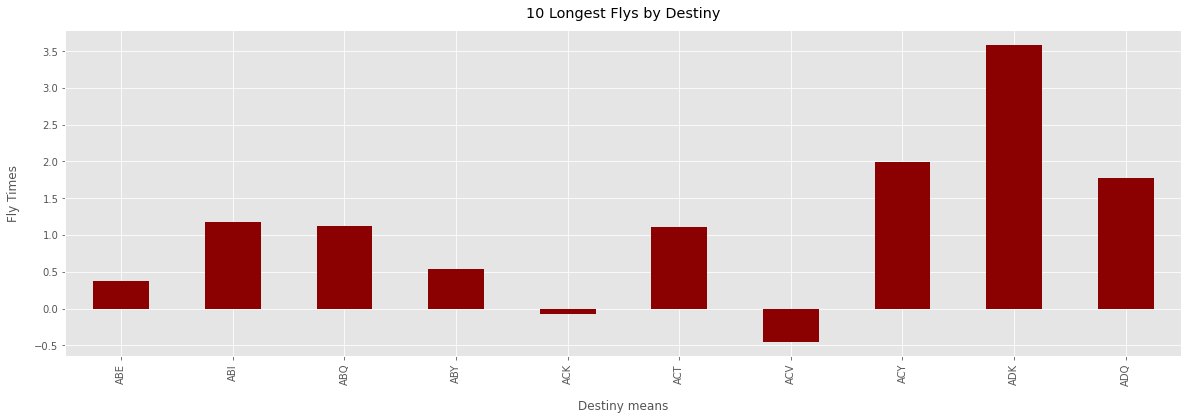

In [14]:
# Vols més llargs 
Most_longest_flies = dfclean.sort_values(by='TempsVol', ascending=False)
# TempsVol per Dest
x = Most_longest_flies['Dest']
y=  Most_longest_flies[['TempsVol']]
# mitja delay per Carrier
mitja = Most_longest_flies.groupby('Dest')['TempsVol'].mean().head(10)

mitja.plot(kind='bar', figsize=(20, 6), color ='darkred')
plt.xlabel("Destiny means", labelpad=14)
plt.ylabel("Fly Times", labelpad=14)
plt.title("10 Longest Flys by Destiny", y=1.02)
plt.savefig("Longest Flys by Destiny.png")
plt.show()


In [15]:
# vols més endarrerits
Most_delayed_flies = dfclean.sort_values(by='DelayMin', ascending=False)
print(Most_delayed_flies[['Origin','Dest','DelayMin','Delay']].head(10))

        Origin Dest  DelayMin  Delay
686014     CLT  MSP    4920.0   True
322516     HNL  MSP    4918.0   True
839306     RSW  DTW    3903.0   True
1009553    LIT  DFW    3417.0   True
1881639    BOS  MSP    3252.0   True
1497823    OMA  MSP    3135.0   True
685437     MOT  MSP    3087.0   True
1214839    SEA  MSP    3028.0   True
521096     BNA  MEM    2980.0   True
545038     LGA  MIA    2891.0   True


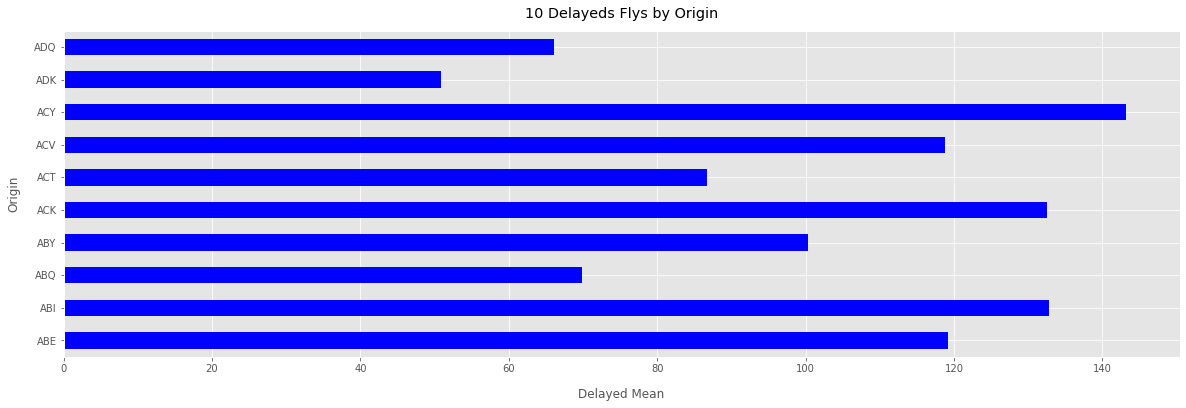

In [16]:
# Delays vs Origin
x = Most_delayed_flies['Origin']
y=  Most_delayed_flies['DelayMin']
# mitja delay per Carrier
mitja = Most_delayed_flies.groupby('Origin')['DelayMin'].mean().head(10)

mitja.plot(kind='barh', figsize=(20, 6), color ='blue')
plt.xlabel("Delayed Mean", labelpad=14)
plt.ylabel("Origin", labelpad=14)
plt.title("10 Delayeds Flys by Origin", y=1.02)
plt.savefig("Delayed Flys by Origin.png")
plt.show()